## Grid Search Hyperparameter optimization
* **Notebook coded and completed by Adam Lang, Springboard Data Science Fellow**
* **Date: 5/13/2024**

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

## Background
* (written by Adam Lang, Springboard Data Science Fellow)
* The Pima Indians are known to have the world's highest reported incidence
of diabetes. Since 1965, the Pima Indian population has participated in a longitudinal
epidemiological study of diabetes and its complications. Usually the examinations include a medical history for diabetes and other health related issues. The Pima Indian populations of Arizona and Mexico continue to be studied to compare the effects of genetics vs. environment and socio-economic factors (Schulz et al. 2015).

### Review of Previous Studies on the Pima Indian Diabetes Database
1. One of the original papers published on results from this database focused on the correlation between the prevalence of **hypertension and glucose tolerance.** In particular the authors had performed a longitudinal analyses of data from **188 Pima Indian children ages 5 to 9 years** who had return follow-up examinations between ages 18-24 and revealed **no relationship between insulin concentration and blood pressure in either sex (de Courten et al. 1996).**
    * This study also looked at criteria for diabetes diagnosis especially the relationship between hypertension which is defined as a systolic pressure of >= 140 mmHg and a diastolic blood pressure of >= 90 mmHg.  The study examined the relationship between insulin and blood pressure in 188 Pima children. The longitudinal analyses of this cohort revealed **no relationship between insulin concentration and blood pressure in either sex.**

2. Diastolic blood pressure is a major variable in this dataset and very often studied in diabetics. This is because diabetics are at a higher risk for left ventricular diastolic dysfunction which leads to a lower diastolic blood pressure or diastolic hypotension. This can also be caused by hypertension usually identified by a higher systolic blood pressure and we know that hypertension is very common in diabetic patients. It is also caused by calcifications in the heart leading to poor filling of the heart ventricles. It is also caused by diabetic nephropathy which often leads to kidney failure and poor circulation resulting in heart failure (de Boer et al. 2017).

3. Another study from 2019 looked at the same female only cohort as the dataset we are about to analze and utilize Machine Learning algorithms to predict diabetes. We should use their results as our hypothesis for what we will find. We would assume that our results would be the same or at least similar depending on the sample size we use vs. their sample size and our data modeling approaches vs. theirs.
  * Sample size: 768 Pima Indian women
  * 500 with diabetes
  * 268 without diabetes
  * Age 21 and over
  * Diabetes was diagnosed based on the World Health Organization criteria (i.e., if the 2-hour post-load plasma glucose was at least 200 mg/dl at any survey examination or if found during routine medical care).
  * They used 8 variables:
      * 1) age
      * 2) ever pregnant
      * 3) number of pregnancies
      * 4) 2 hour serum insulin (mu U/ml),
      * 5) Body Mass Index (BMI) (weight in kg/(height in m)^2,
      * 6) diastolic blood pressure (mm Hg) (BP),
      * 7) plasma glucose concentration a 2-hour glucose tolerance test
      * 8) triceps skin-fold thickness (mm).
  * Bashir et al. 2019 concluded the following:
      * Pima Indian women were at a **higher risk for contracting diabetes** if they were:
          * younger in age
          * normal body weight (normal BMI)
          * have a fewer number of children (less pregnancies)
          * with hypotension, low or normal diastolic blood pressures
      * Pima Indian women were at **lower risk for contracting diabetes** if they were:
          * older age
          * overweight
          * with more children (more pregnancies)
          * hypertension (higher diastolic pressure)
      * The authors also concluded that genetics or hereditary factors are therefore more likely to contribute to diabetes onset in the Pimas offspring generation.


### Hypothesis and Predictions
* Based on these previous studies conducted on the Pima Indian database mentioned above, we should see similar results. However, if our sample size is smaller then we may see different results. Let's find out.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#set dataset path
data_path = '/content/drive/MyDrive/Springboard_Data_Science/Model Optimization/Grid Search KNN Case Study/diabetes.csv'

In [4]:
# upload the dataset
diabetes_data = pd.read_csv(data_path)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [5]:
# data info
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [6]:
## describe data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Overview of the Features/Variables in the dataset
Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
* Pregnancies - number of times the woman has been pregnant.
* Glucose - Plasma glucose concentration at 2 hours takeb by oral glucose tolerance test.
* Blood Pressure - diastolic blood pressure in mmHg
* Insulin - 2-Hour serum insulin (mu U/ml)
* BMI - Body mass index (weight in kg/(height in m)^2).
* **Diabetes Pedigree Function**
    * This is a function that scores the probability or likelihood of a diagnosis of diabetes based on a family history of diabetes, with a realistic range of 0.08 to 2.42. Age has a realistic range from 21 to 81. The Outcome, in the target variable, 0 represents healthy people, and 1 represents those with diabetes (Akmese, 2022).
    * The primary risk factors for diabetes from this function are **Age** and **Family history of Diabetes**.
    * The original calculation was developed my Smith et al. in 1988.
        * The DPF uses information from parents, grandparents, full and half siblings, full and half aunts and uncles, and first cousins. It provides a measure of the expected genetic influence of affected and unaffected relatives on the subject's eventual diabetes risk. The diabetes pedigree function:
              
        * See original paper: https://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC2245318&blobtype=pdf

    * Clinical family history reveals important genomic info, which characterizes the joint interactions between behavioral, environmental, and genetic factors. It is usually true more often than not that an individual with type 2 diabetic patient has some of his/her family members (e.g. at least a sibling, or a parent) that may have type 2 diabetes (T2D) (Das et al. 2022). However, Type 2 diabetes is thought to result from a combination of environmental, behavioral, and genetic factors, with the heritability of type 2 diabetes estimated to be in range of 25% - 72% based on studies of families and twins. The genome-wide association studies (GWAS) started in 2007 collecting genetic data for diabetes with approximately 100 gene loci linked to type 2 diabetes.
          * So far, only about `10%–15%` of the genetic predisposition to the disease is linked to these known loci. The Limitations of the early GWAS included:
              * insufficient sample sizes to detect small effects
              * exclusive focus on populations of European descent
              * imperfect capture of uncommon genetic variants
              * incomplete ascertainment of alternate (non-SNP) forms of genetic variation
              * lack of exploration of additional genetic models
              * source: Florez et al. 2018.
* Age - age in years
* Outcome
  * 0 - non-diabetic
  * 1 - diabetic


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [7]:
## replace 0 with nan
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [8]:
## look for nan values we just imputed
diabetes_data.isna().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

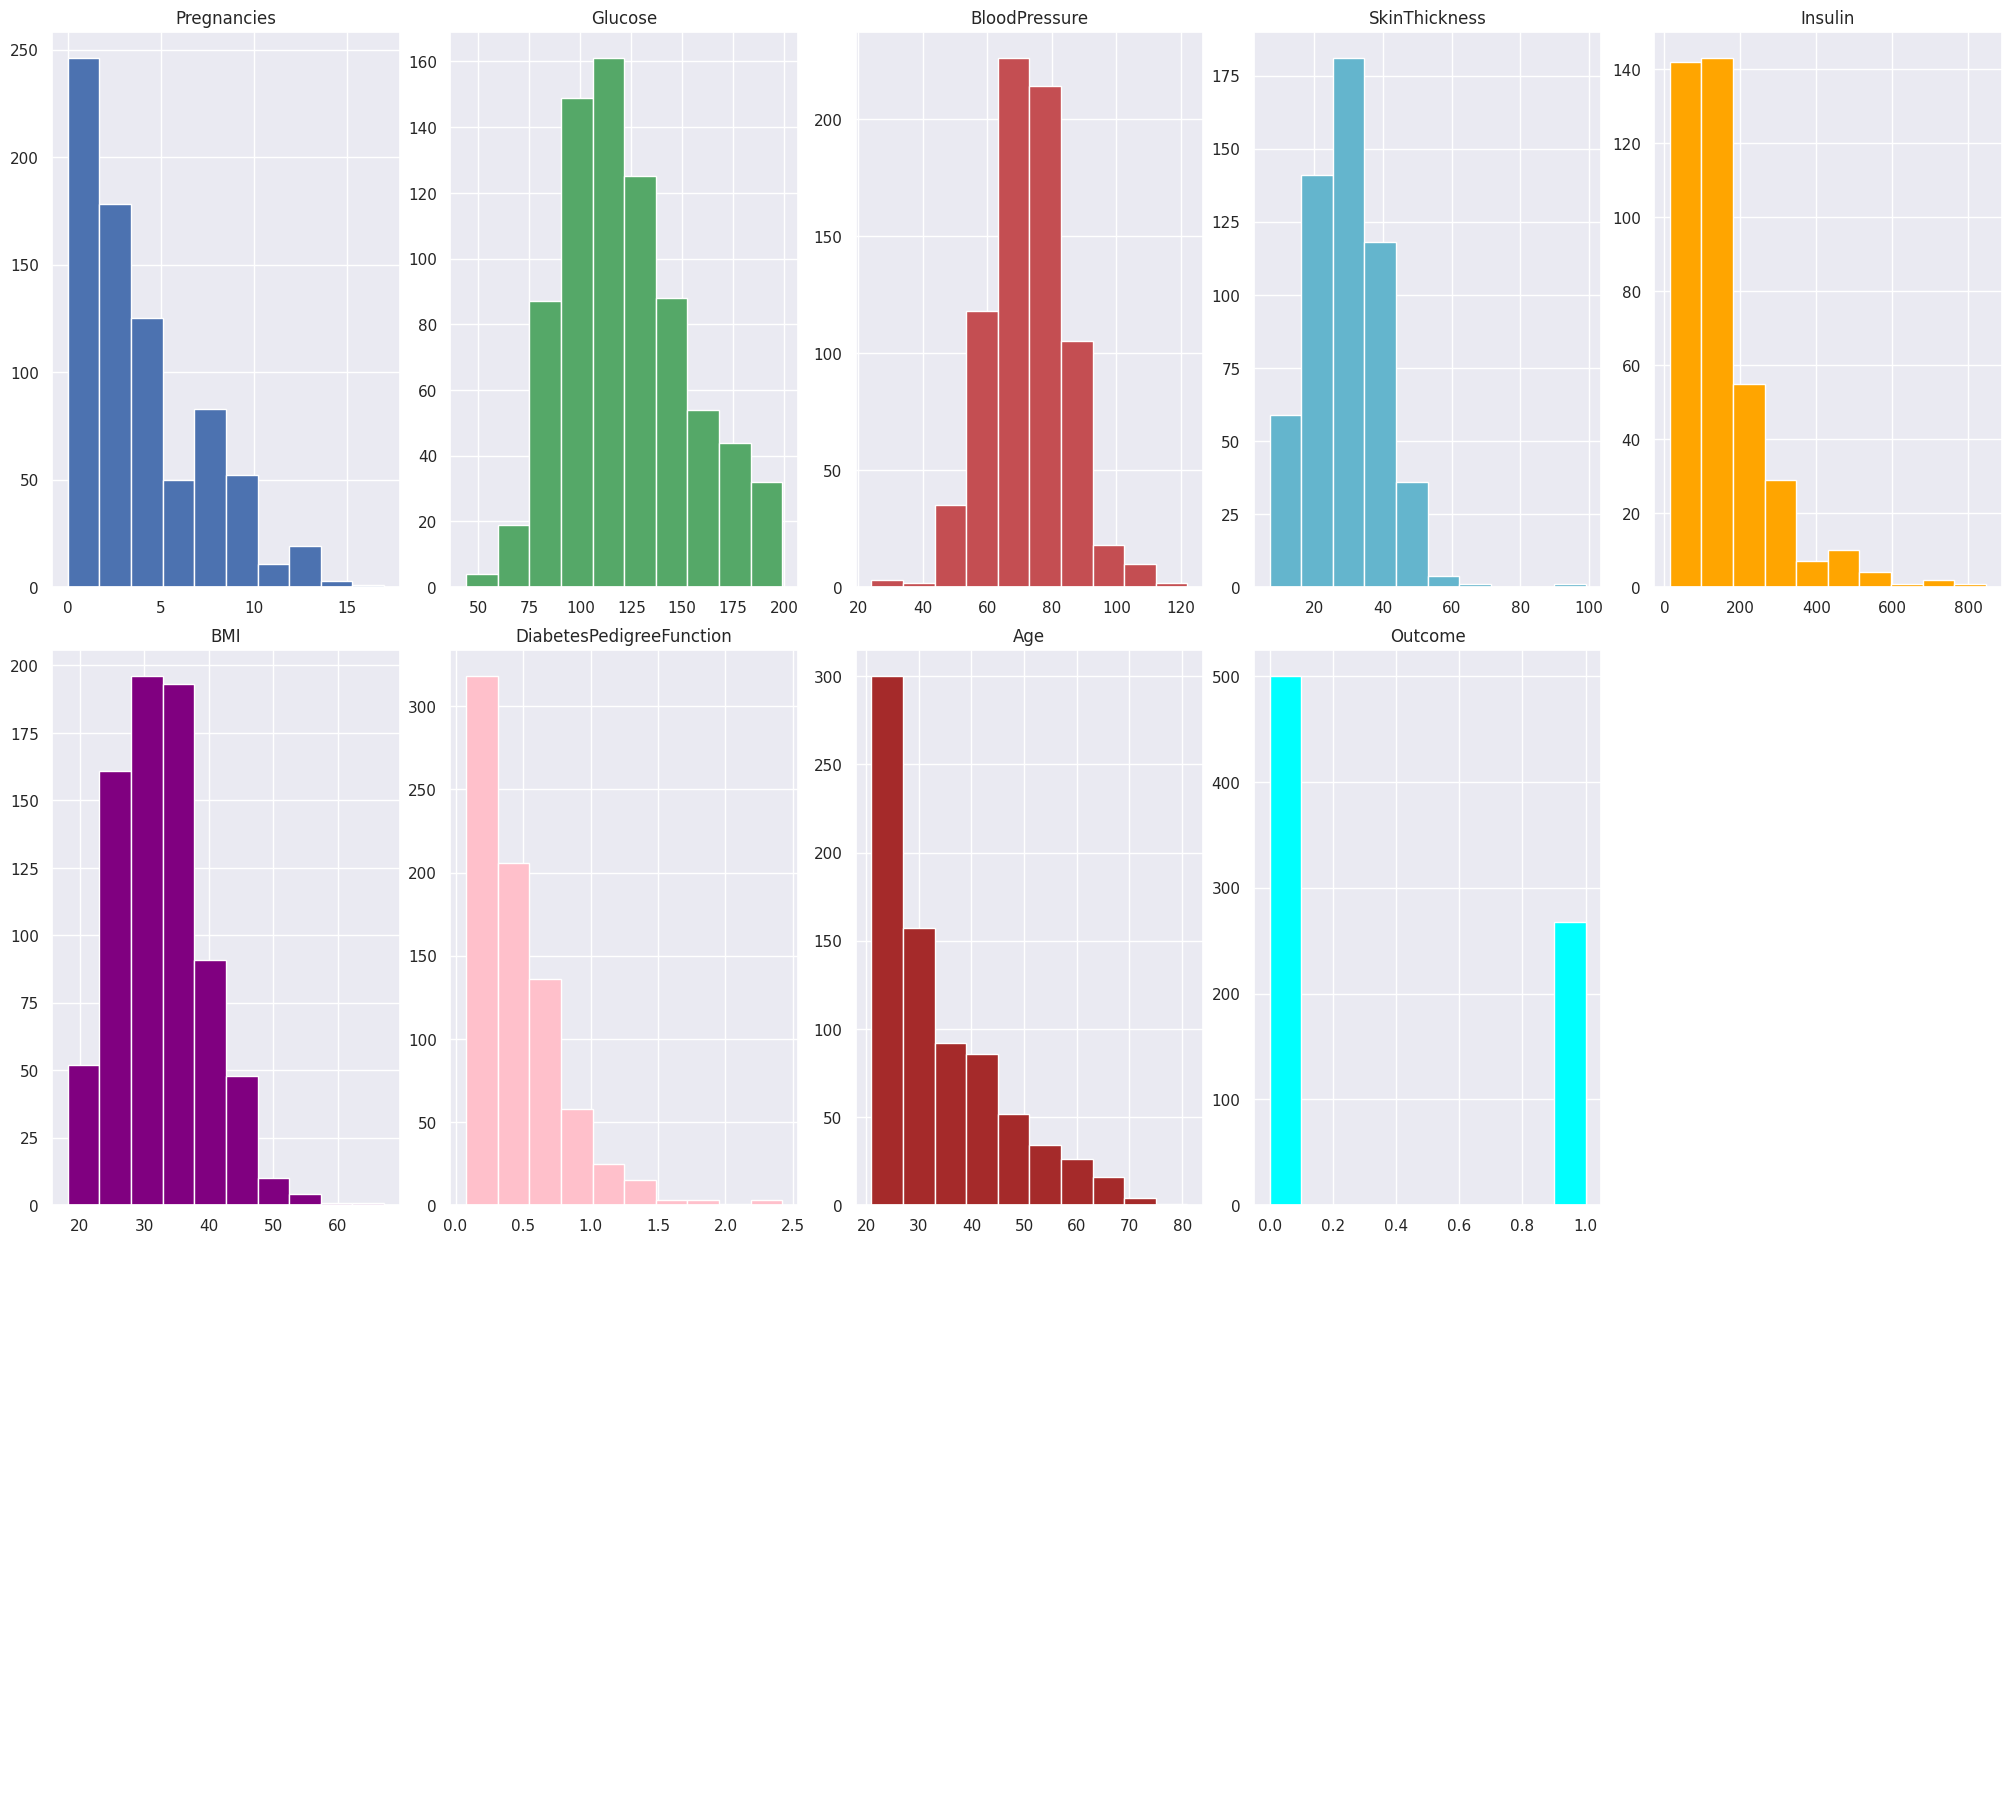

In [9]:
## plot histograms of each column
fig, axes = plt.subplots(3, 5, sharey=False, layout='constrained')
fig.set_size_inches(20,18, forward=True)
colors = ['b', 'g', 'r', 'c', 'orange', 'purple', 'pink', 'brown', 'cyan']

## loop through each column and create histogram
for col, color, ax in zip(diabetes_data.columns,colors, axes.flat):
    diabetes_data[col].hist(ax=ax,color=color)
    ax.set_title(col)

# delete the leftover axes
for ax in axes.flat[diabetes_data.columns.size:]:
     ax.set_axis_off()

plt.show();

#### Replace the zeros with mean and median values.

In [10]:
# replace zeros mean and median values
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [11]:
## check na values
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

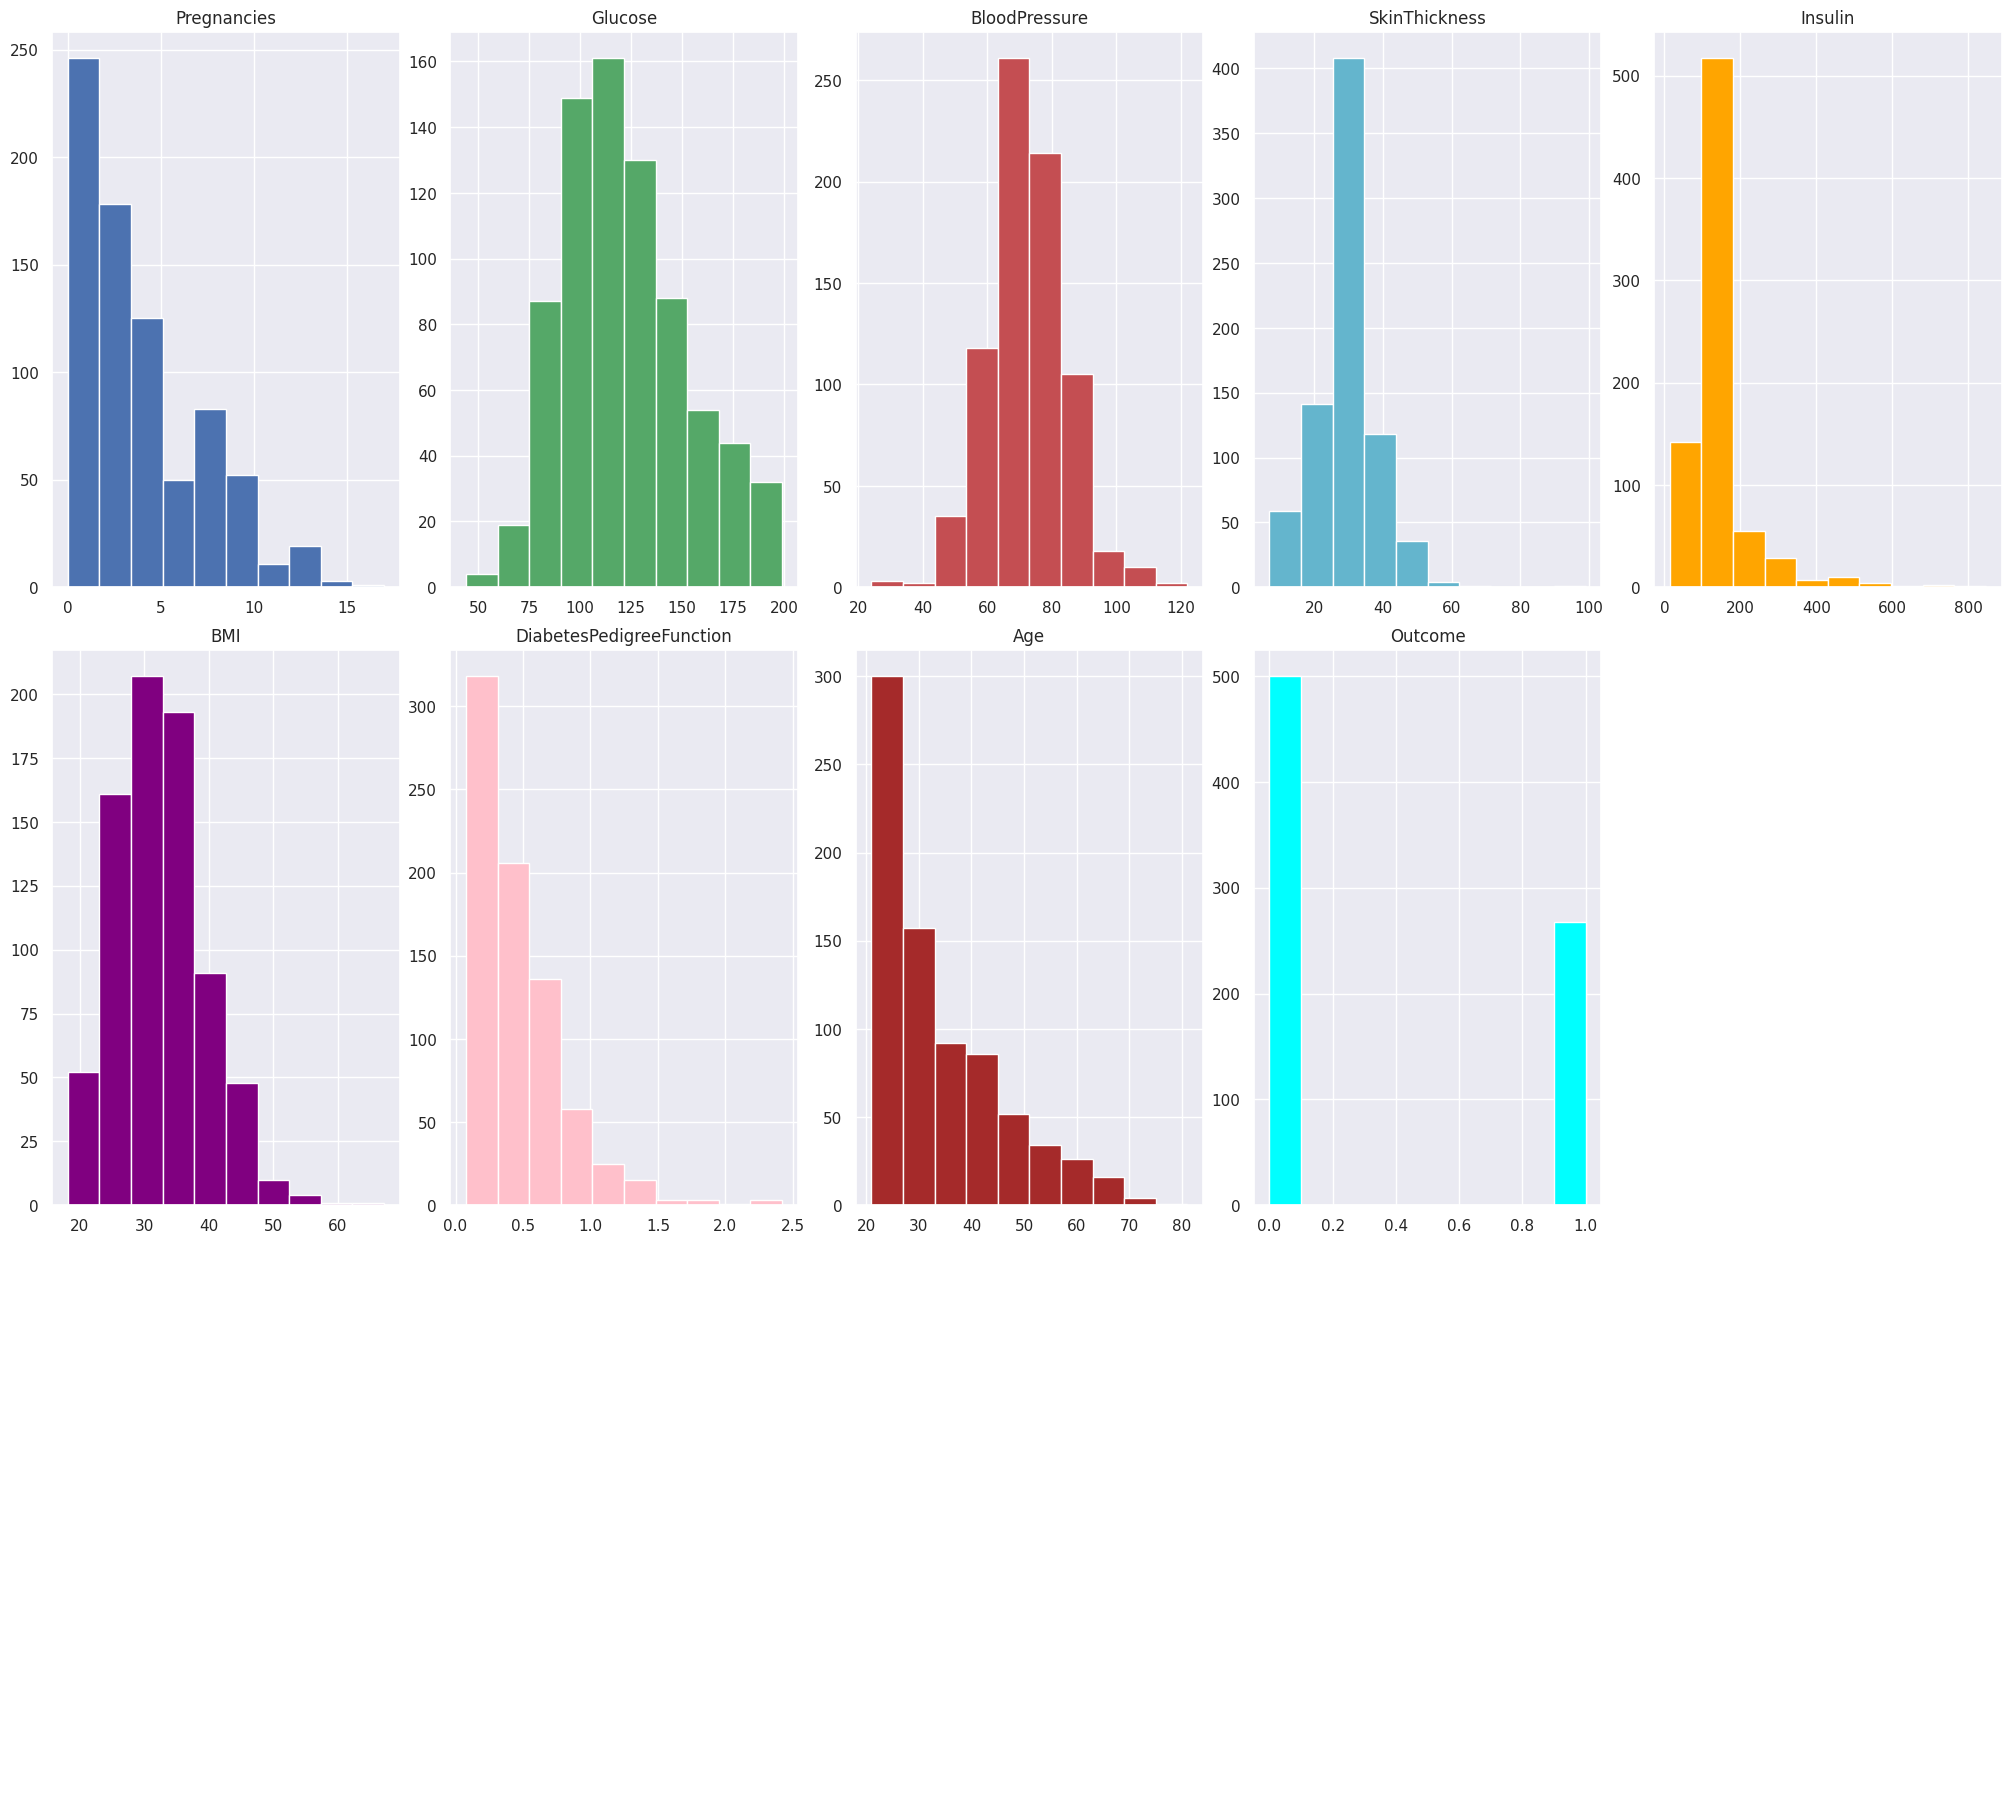

In [12]:
## plot histograms of each column
fig, axes = plt.subplots(3, 5, sharey=False, layout='constrained')
fig.set_size_inches(20,18, forward=True)
colors = ['b', 'g', 'r', 'c', 'orange', 'purple', 'pink', 'brown', 'cyan']

## loop through each column and create histogram
for col, color, ax in zip(diabetes_data.columns,colors, axes.flat):
    diabetes_data[col].hist(ax=ax,color=color)
    ax.set_title(col)

# delete the leftover axes
for ax in axes.flat[diabetes_data.columns.size:]:
     ax.set_axis_off()

plt.show();

## Boxplots of the data
* I am going to make boxplots of the data to get a better look at the outliers and distribution of the feature variables.

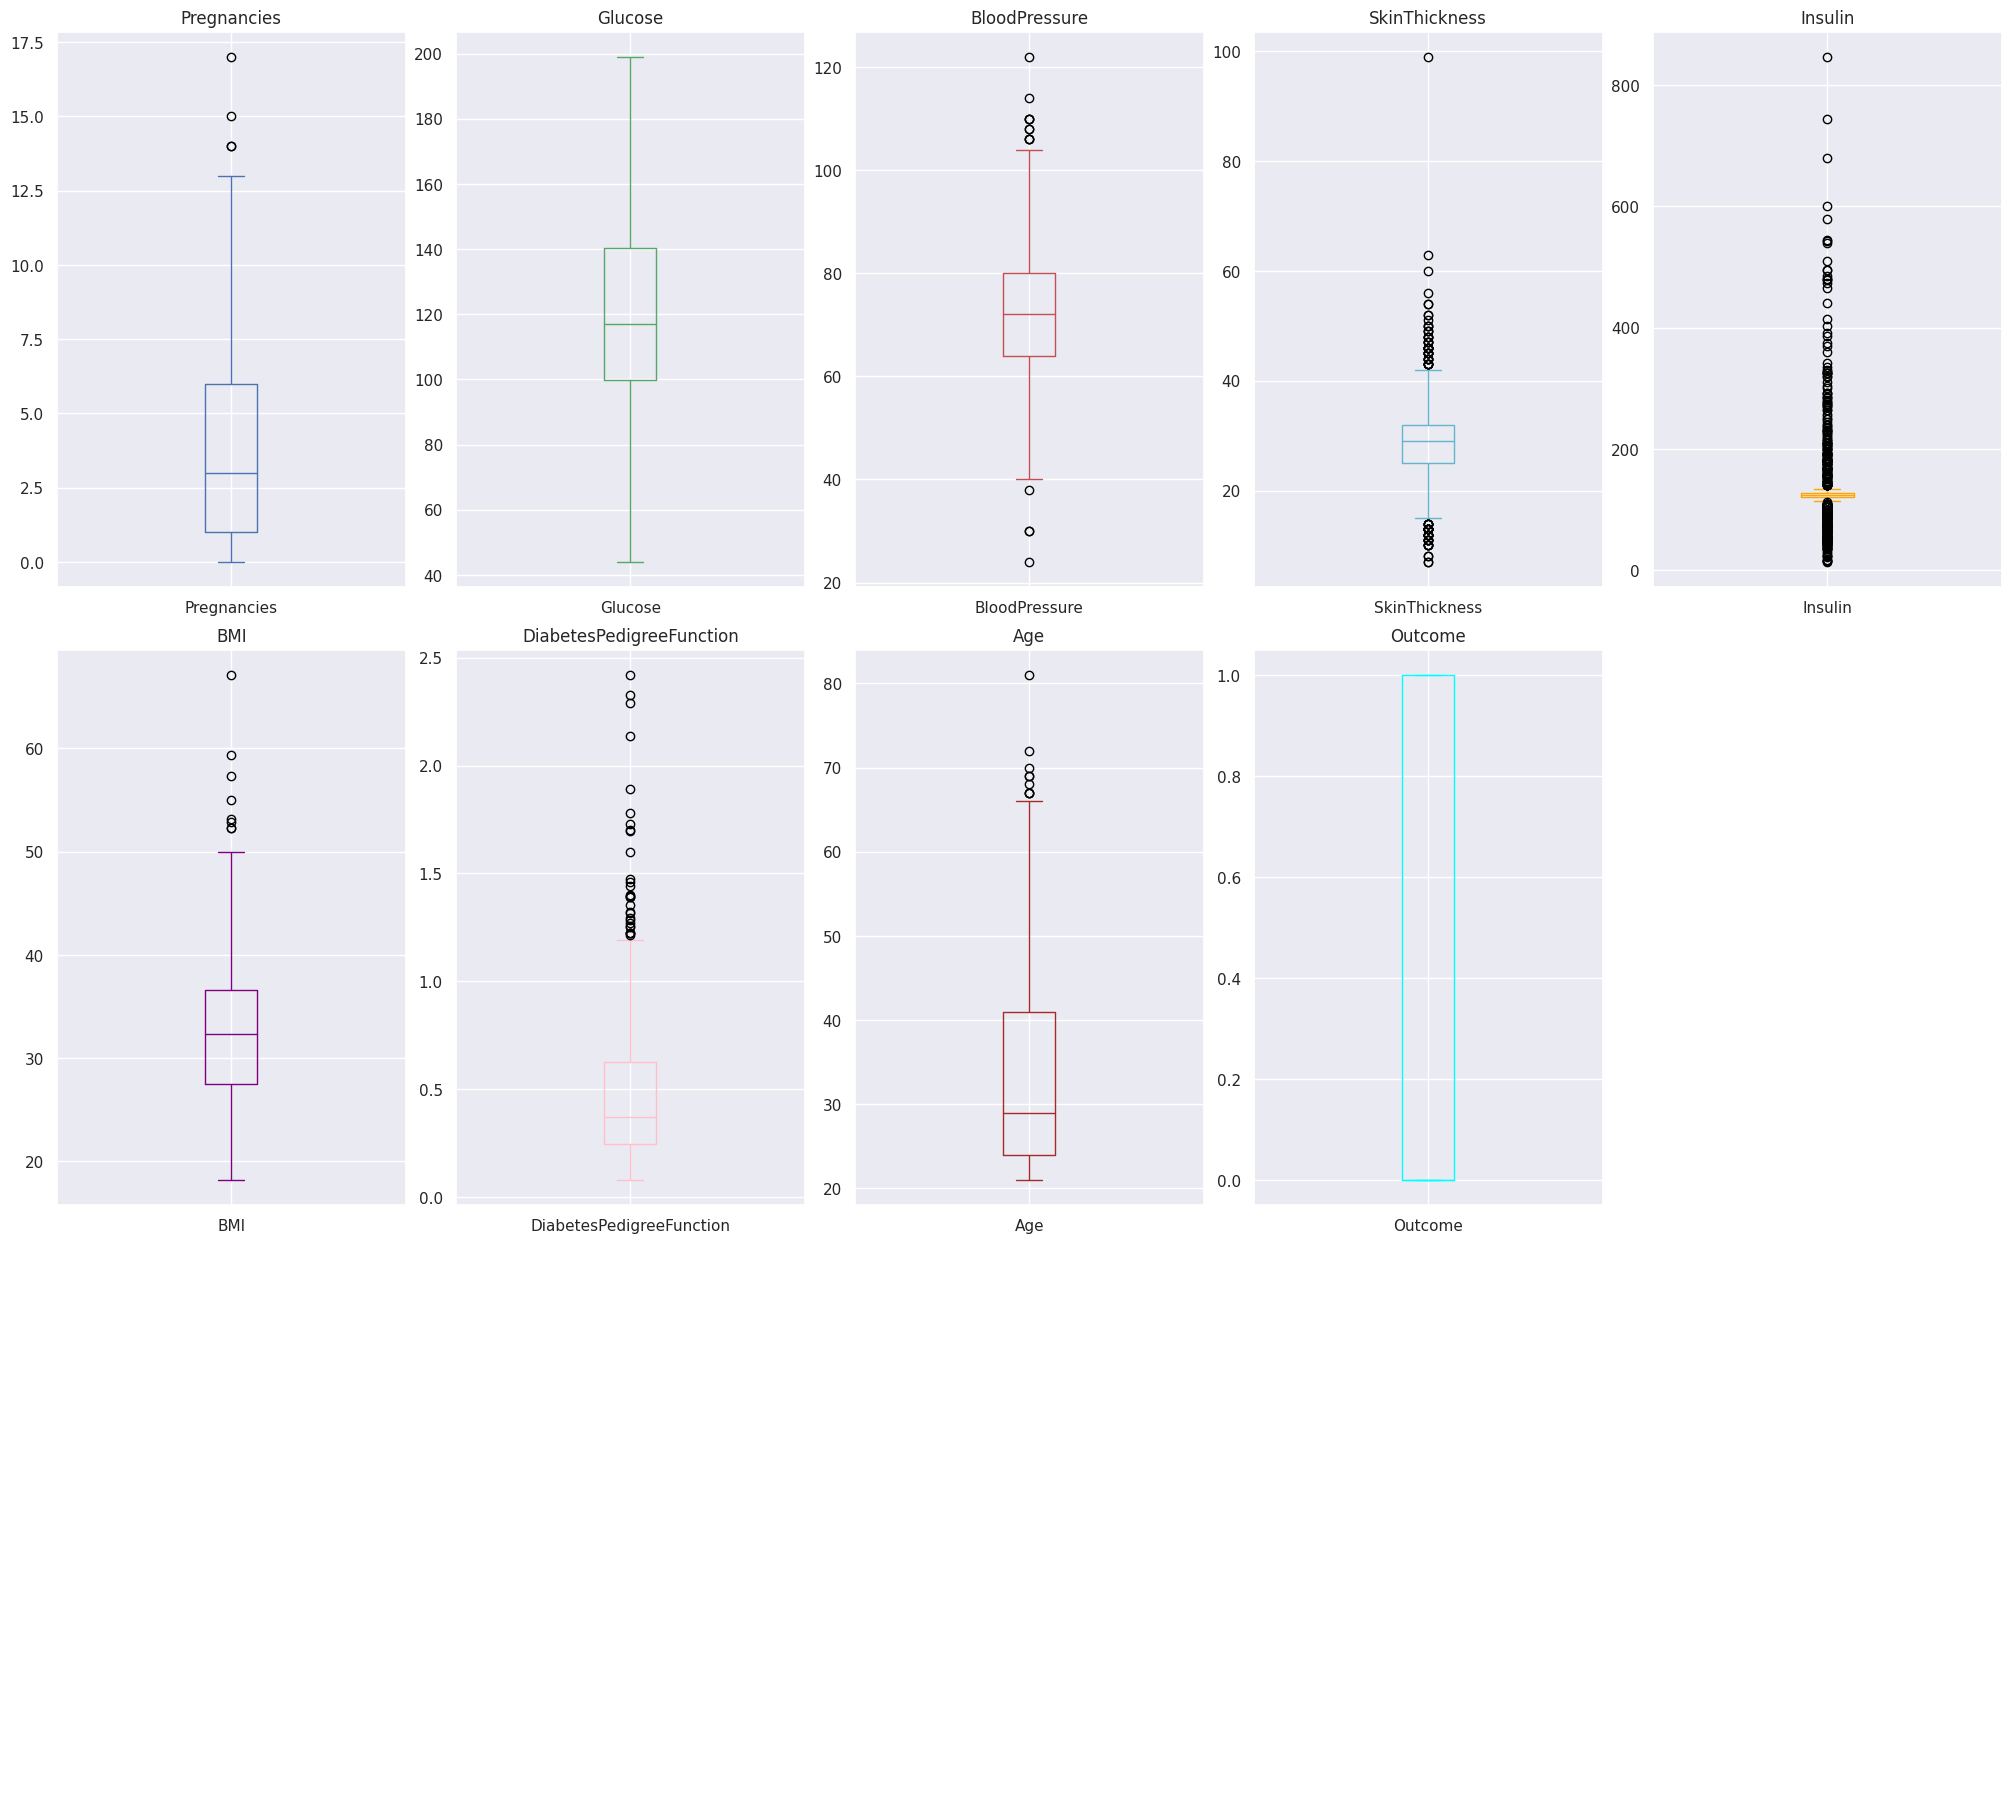

In [13]:
## plot boxplots of each column
fig, axes = plt.subplots(3, 5, sharey=False, layout='constrained')
fig.set_size_inches(20,18, forward=True)
colors = ['b', 'g', 'r', 'c', 'orange', 'purple', 'pink', 'brown', 'cyan']

## loop through each column and create histogram
for col, color, ax in zip(diabetes_data.columns,colors, axes.flat):
    diabetes_data[col].plot(ax=ax,color=color,kind='box')
    ax.set_title(col)

# delete the leftover axes
for ax in axes.flat[diabetes_data.columns.size:]:
     ax.set_axis_off()

plt.show();

### Observations
* The features with the most outliers appear to be:
    * Skin Thickness
    * Insulin
    * Diabetes Pedigree Function
* There are only a few outliers noted in these feature columns:
    * Pregnancies
    * Blood Pressure
    * BMI
    * Age
* Some other interesting observations in the data
    * Most of the women included in the dataset have had between 1 and 6 pregnancies based on the 1st quartile, median and 3rd quartile of data.  
    * The glucose median is close to 120 and the 1st and 3rd quartiles are at 100 and 140 respectively.
    * The diastolic blood pressure seems to range between 60 and 80 which is considered normal. There are obviously individuals in the dataset who show signs of diastolic hypotension (less than 60 mmHg) and diastolic hypertension (greater than 90). It would be interesting to segment these groups out to see how each group of hypotension, normal and hypertension do as predictors of diabetes or not.
    * The median for age is around 28, with the 1st and 3rd quartiles around 25 and just over 40. The max age appears to be around 65 and the min age around 21.
    * The diabetes pedigree function value ranges from 0.07 to 1.2 with the 1st quartile at 0.2 and the 3rd quartile at 0.6. The median is at 0.4. There are a lot of outliers seen in this variable. We briefly discussed above the DPF uses information from parents, grandparents,
    full and half siblings, full and half aunts and uncles, and first
    cousins. It provides a measure of the expected genetic influence of
    affected and unaffected relatives on the subject's eventual diabetes
    risk.

#### Plot the correlation matrix heatmap

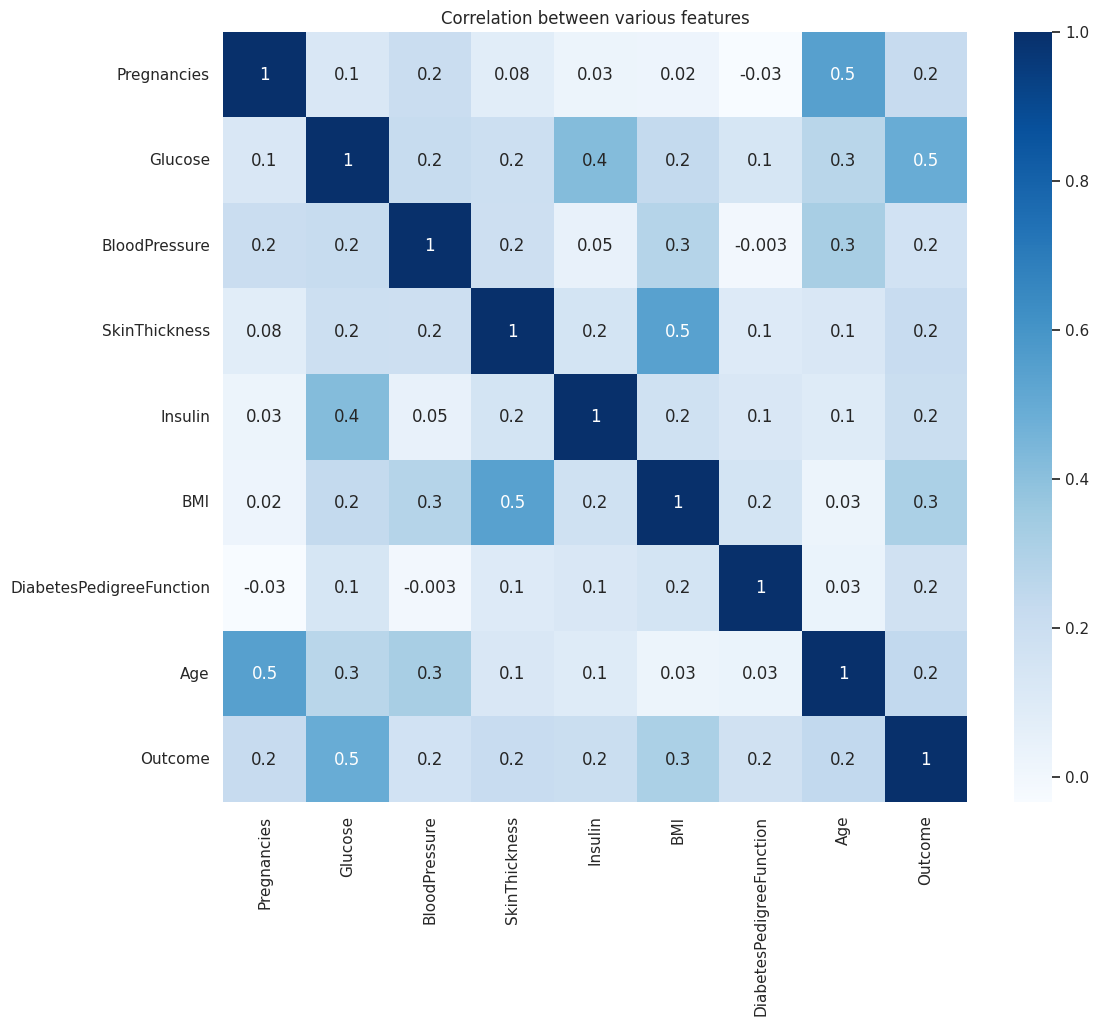

In [14]:
## plotting corr heat map
plt.figure(figsize=(12,10))
#print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues',fmt='.1g').set(title='Correlation between various features')
plt.show();

### Observations
* There seem to be no significantly strong positive or negative correlations between feature variables.
* Question: Is this a sign of multi-collinearity?
    * Multicollinearity occurs when there are 2 or more independent variables in a multiple regression model, which have a high correlation among themselves.
    * When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable.
    * For the most part multi-collinearity is not a concern with KNN models as a KNN is a non-parametric "lazy-learning" algorithm and not a linear model. However, we can infer that multi-collinearity can still apply to a KNN model because a KNN model assumes every point can be represented in a multidimensional space as a coordinate ((e.g. 3, 2.5, 6.7, 9.8) on an X training set with 4 dimensions). It also does not masure information and data conetent and treats feature variables the same as they are indpendent (Ye, 2020). Thus, if the points in a KNN model get really close together due to the multi-collinearity or high correlation with themselves, then this can lead to misleading results. Therefore I am going to take a quick look at the features in our data for this finding.
        * Multicollinearity can be detected using various techniques, such as the Variance Inflation Factor(VIF).

        * In the VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :
          `VIF = 1 / 1-R^2`

        * Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.
        * The VIF formula tells us:
          * The greater the value of R squared = greater VIF
          * A greater VIF = greater correlation = creater collinearity.
          * Usually values above 5 are indicative of high multi-collinearity.

* Source: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [15]:
## VIF using statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = diabetes_data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(diabetes_data.values, i)
						for i in range(len(diabetes_data.columns))]

print(vif_data.sort_values(by='VIF',ascending=False))


                    feature        VIF
5                       BMI  34.010670
2             BloodPressure  33.880045
1                   Glucose  24.174531
3             SkinThickness  17.325876
7                       Age  14.354981
4                   Insulin   4.528764
0               Pregnancies   3.365255
6  DiabetesPedigreeFunction   3.169283
8                   Outcome   2.006609


## Observations
* We should be aware of the variables with VIF above 5 which we can see above are:
    * BMI (34.01)
    * BloodPressure (33.88)
    * Glucose (24.17)
    * SkinThickness (17.32)
    * Age (14.35)

### Pairplots
* I am going to make pairplots of the feature variables vs. the target variable 'Outcome' prior to performing the train test split just to verify what we are seeing in the Correlation heatmap.

Pairplot of feature variables vs. Outcome


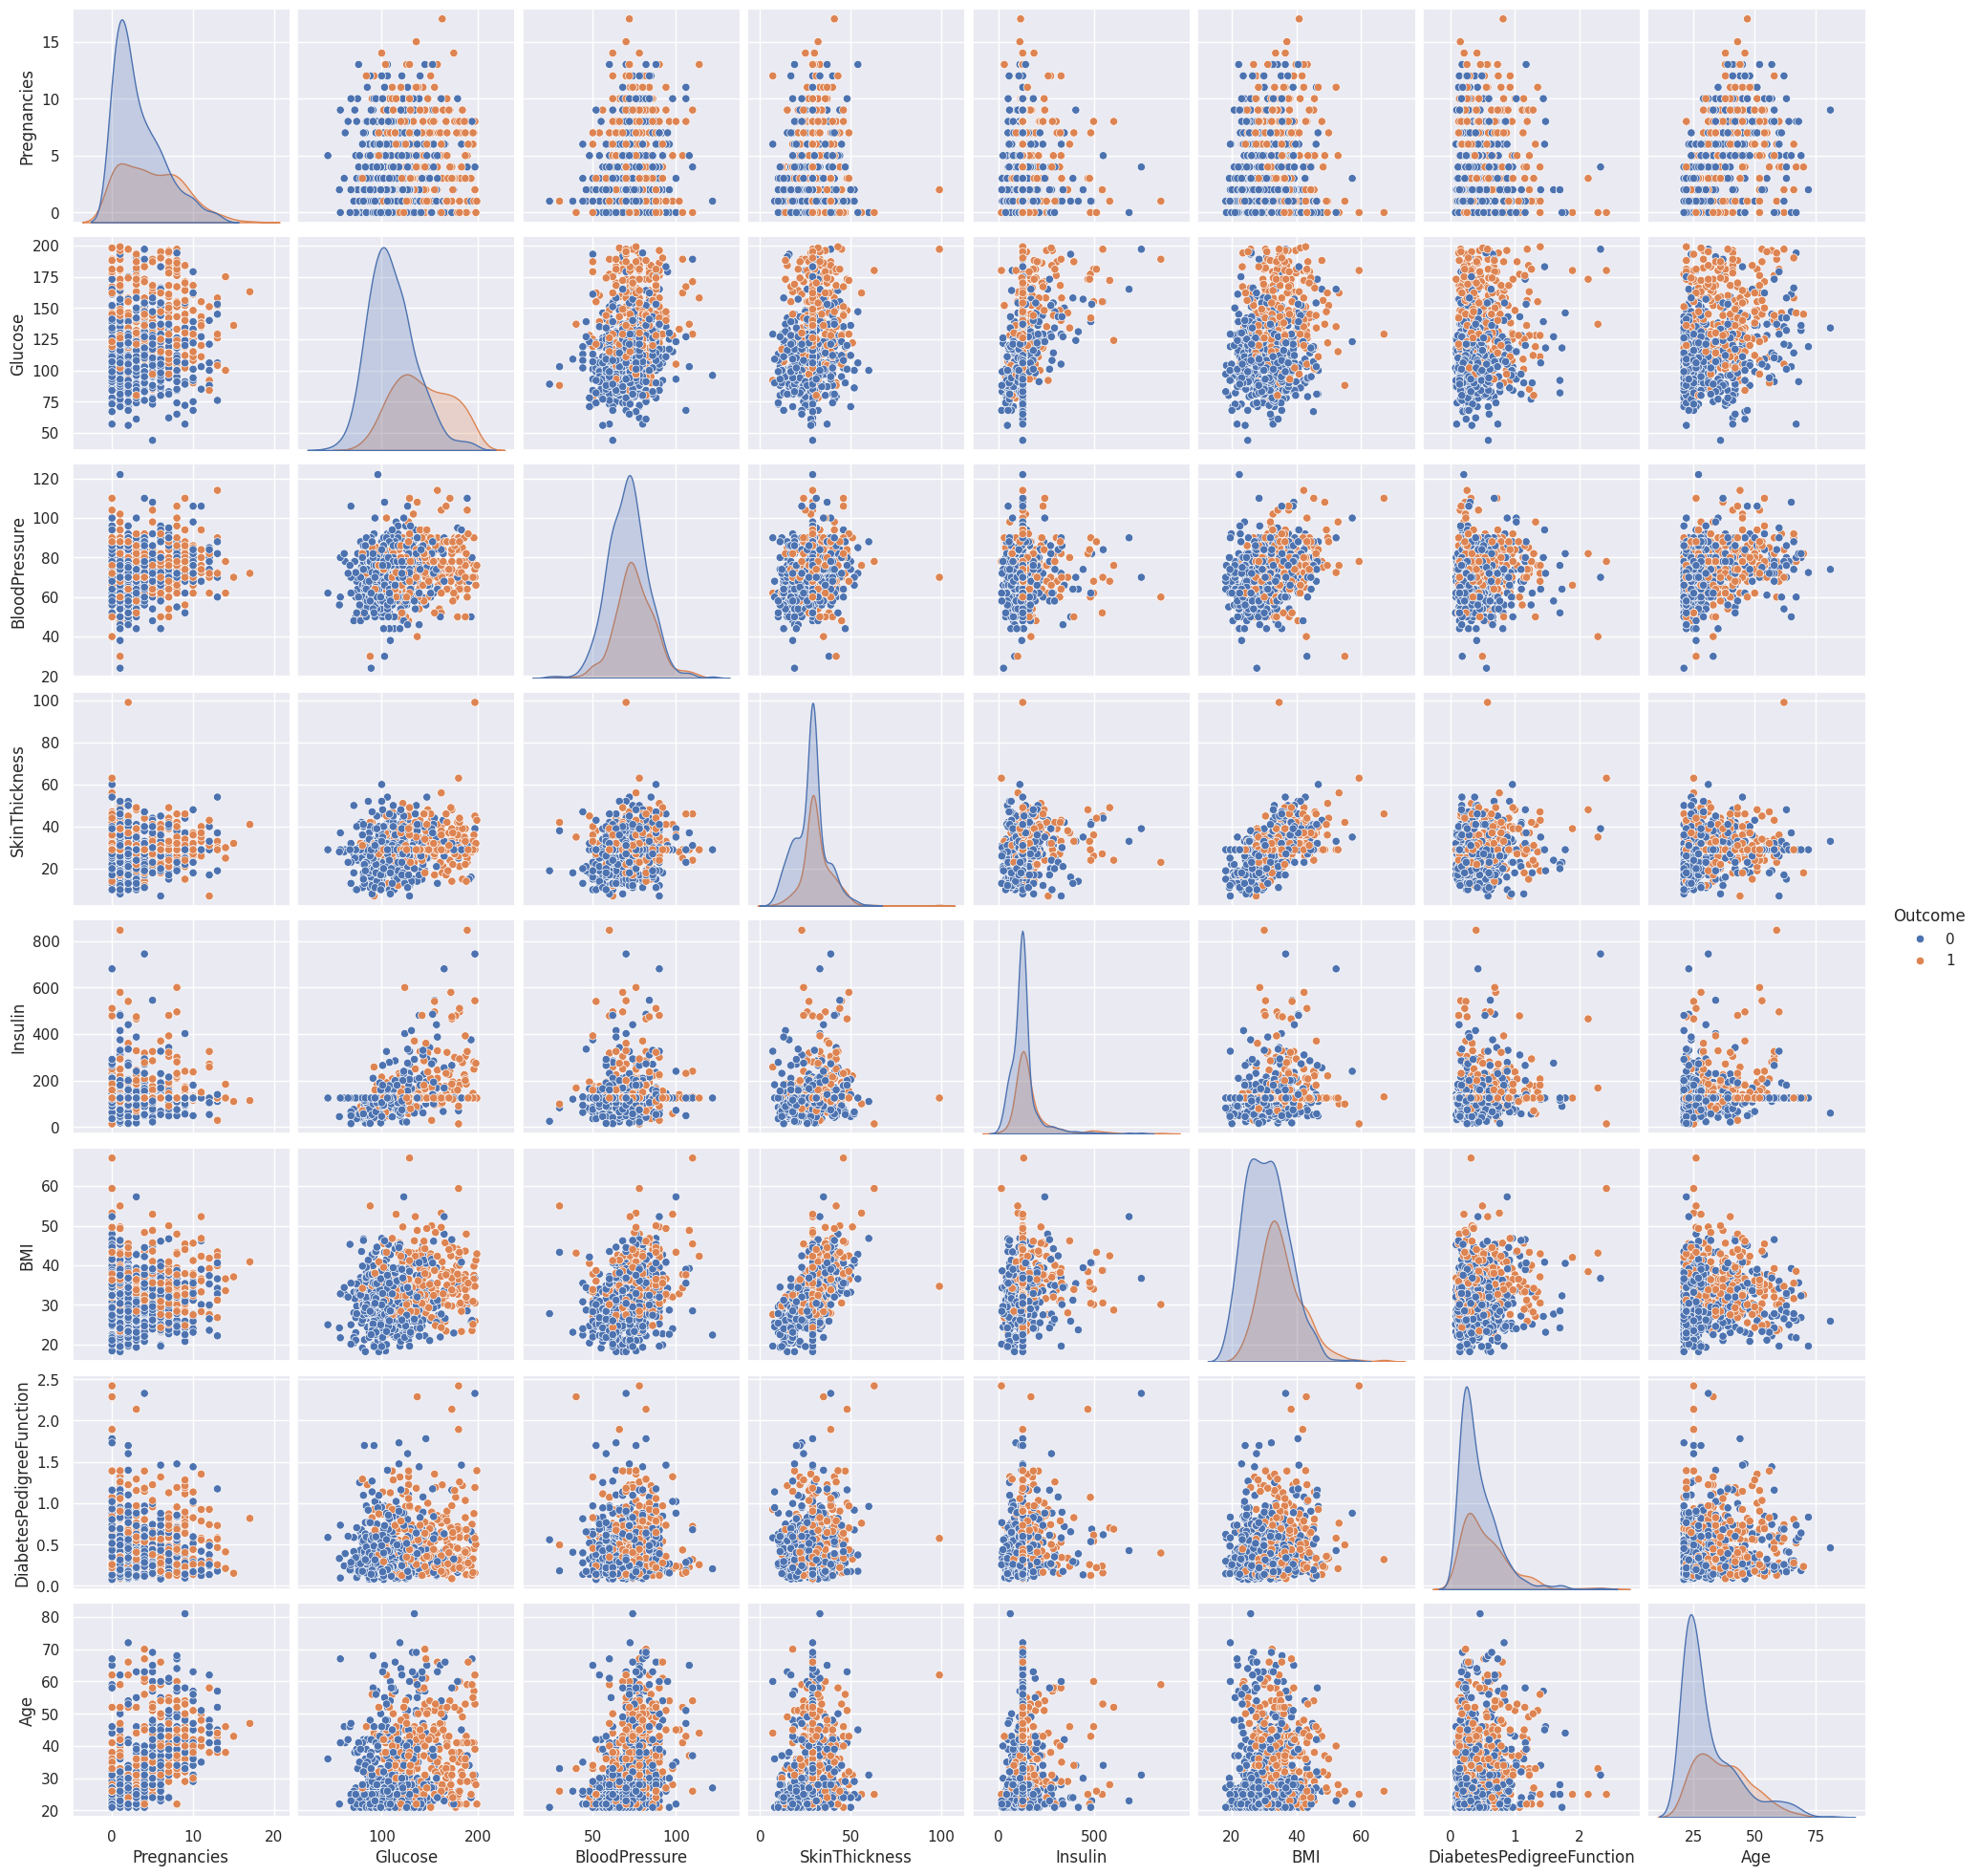

In [16]:
## pairplot vs. target variable before splitting into X and y
print("Pairplot of feature variables vs. Outcome")
sns.pairplot(diabetes_data, hue='Outcome')
plt.show();

### Observations
* Again we can't see any significant correlations in the feature variables related to the Outcome target variable.

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [17]:
## setup X and y features
X = diabetes_data.drop('Outcome',axis=1)
y = diabetes_data['Outcome']

In [18]:
# let's sample the y target variable
print(y[0:5])

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [19]:
# sample the X feature variables
print(X[0:10])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0      72.000000           35.0    125.0  33.6   
1            1     85.0      66.000000           29.0    125.0  26.6   
2            8    183.0      64.000000           29.0    125.0  23.3   
3            1     89.0      66.000000           23.0     94.0  28.1   
4            0    137.0      40.000000           35.0    168.0  43.1   
5            5    116.0      74.000000           29.0    125.0  25.6   
6            3     78.0      50.000000           32.0     88.0  31.0   
7           10    115.0      72.405184           29.0    125.0  35.3   
8            2    197.0      70.000000           45.0    543.0  30.5   
9            8    125.0      96.000000           29.0    125.0  32.3   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [20]:
# import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Create the 70/30 train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
## let's look at shape of the data
print(f"The X_train shape is: {X_train.shape}")
print(f"The X_test shape is: {X_test.shape}")
print(f"The y_train shape is: {y_train.shape}")
print(f"The y_test shape is: {y_test.shape}")

The X_train shape is: (537, 8)
The X_test shape is: (231, 8)
The y_train shape is: (537,)
The y_test shape is: (231,)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [22]:
# import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# fit the scaler to X_train
sc = StandardScaler()

# transform with scaler
X_train = sc.fit_transform(X_train) # fit and transform X_train
X_test = sc.transform(X_test) # apply fitted scaler with transform() method to X_test

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [23]:
## import KNN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# setup dicts to save test and train scores linked to each K tested
test_scores = {}
train_scores = {}

## loop through classifier model for range of K 1-10
for k in range(1,11):
    ## fit training data to KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)

    ## append scores from KNN model to train and test dicts
    train_scores[k] = knn.score(X_train,y_train)
    test_scores[k] = knn.score(X_test,y_test)



**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [24]:
## print train scores for each iteration to a dataframe
iter_df = pd.DataFrame({'train_scores': train_scores, 'test_scores': test_scores}).reset_index()
iter_df.columns = ['k_value','train_scores','test_scores']
iter_df

,k_value,train_scores,test_scores
0,1,1.000000,0.666667
1,2,0.851024,0.670996
2,3,0.854749,0.670996
3,4,0.841713,0.692641
4,5,0.839851,0.701299
5,6,0.823091,0.683983
6,7,0.834264,0.731602
7,8,0.821229,0.735931
8,9,0.826816,0.731602
9,10,0.817505,0.718615


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [25]:
## we will print the max() of the train_scores column
filtered_df_train = iter_df[iter_df['train_scores'] == iter_df['train_scores'].max()]
print("Train_score with best K_value")
filtered_df_train

Train_score with best K_value


,k_value,train_scores,test_scores
0,1,1.0,0.666667


A K value of 1 had the max score in the train data.

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [26]:
## filter df for test scores max()
filtered_df_test = iter_df[iter_df['test_scores'] == iter_df['test_scores'].max()]
print("Test_score with best K_value")
filtered_df_test

Test_score with best K_value


,k_value,train_scores,test_scores
7,8,0.821229,0.735931


A K value of 8 had the max score in the test data.

Plot the train and test model performance by number of neighbors.

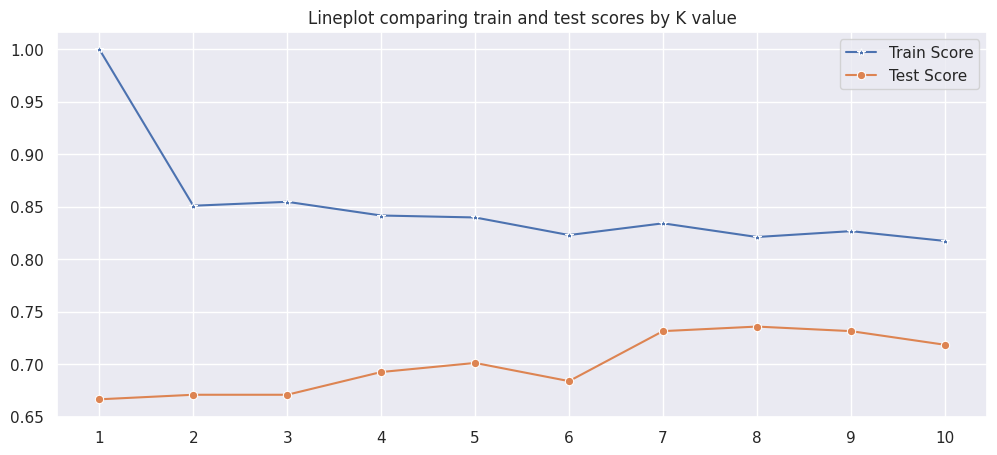

In [27]:
## plot of train and test KNN models by performance and n_neighbors
plt.figure(figsize=(12,5))
plt.title("Lineplot comparing train and test scores by K value")
plt.xticks(range(1,11,1))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')
plt.show();

## Observations
* The max value of K for the test data is 8 as seen in the plot, which achieves an accuracy score of almost 75%. We will go with this K value. We can see that the Train score at a K of 8 is an accuracy of ~82%.
* While the max train score of 1.00 is at a K of 1, that is not reasonable, we want the test scores as a predictor of how our model will do on the data and the test set.

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [28]:
## KNN with 8 neighbors based on plot
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [29]:
## create raw confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
print(pl)

[[126  25]
 [ 36  44]]


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**
* I am going to use a really handy function to plot the confusion matrix via import from github using pathlib.

In [30]:
import requests
from pathlib import Path # allows us to create file paths

# download helper functions from learn PyTorch repo (if not already downloaded - if else)
if Path("cf_matrix.py").is_file():
  print("cf_matrix.py already exists, skipping download")
else:
  print("Downloading cf_matrix.py")
  request = requests.get("https://raw.githubusercontent.com/DTrimarchi10/confusion_matrix/master/cf_matrix.py")
  with open("cf_matrix.py", "wb") as f:
    f.write(request.content)


from cf_matrix import make_confusion_matrix

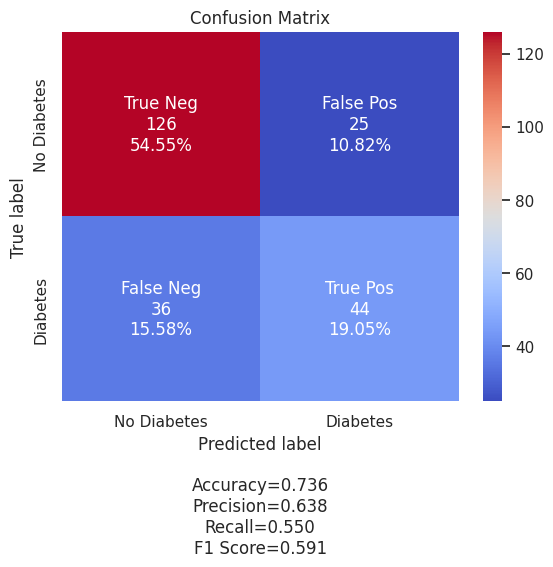

In [31]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['True Neg','False Pos','False Neg','True Pos']
target_names = ["No Diabetes", "Diabetes"]

## let's use the function
make_confusion_matrix(pl,group_names=labels,
                      categories=target_names,
                      title="Confusion Matrix",
                      cmap='coolwarm')

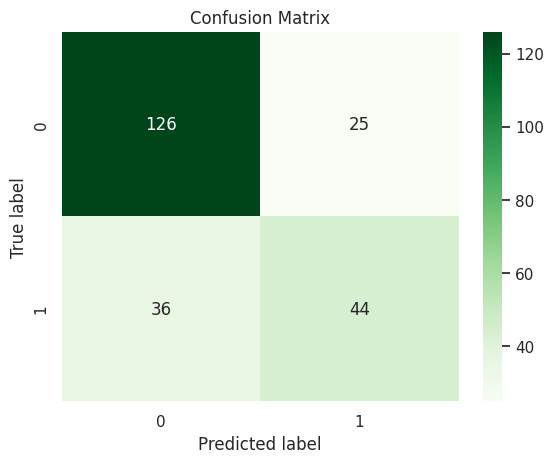

In [32]:
## another visualization of the confusion matrix
sns.heatmap(pl,annot=True,fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

## Observations of Confusion Matrix
* We see 2 confusion matrices with the same results which follow the 0 is no diabetes and 1 is diabetes.
* The results:
    * First row is 0 - no diabetes
        * 126 (54.55%) - True negative
        * 25 (10.82%) - False positive
    * Second row is 1 - Diabetes
        * 36 (15.58%) - False negative
        * 44 (19.05%) - True positives
* This means the model is predicting more true negatives 126 (54.55%) for people without diabetes than true positives 44 (19.05%) with diabetes).
* The model is also showing 25 or 10.82% false positives which are likely true negatives (without diabetes)
* The model is showing 36 or 15.58% false negatives which are likely true positives (with diabetes)


**<font color='teal'> Print the classification report </font>**

In [71]:
## print classification report
from sklearn.metrics import classification_report
target_names = ["No Diabetes", "Diabetes"]
print("Classification Report for KNN with n=8 neighbors")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report for KNN with n=8 neighbors
              precision    recall  f1-score   support

 No Diabetes       0.78      0.83      0.81       151
    Diabetes       0.64      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



## Observations of Classification Report
* Accuracy shows us how often the model is correct overall. The result is 0.74 so this means that 74% of the time we can expect the model to make a correct prediction.
* Precision shows how often the model is correct when predicting the target class (0 no diabetes, 1 diabetes). Our model shows that 78% of the time correct when predicting no diabetes (0) but only 64% of time correct when predicting diabetes (1).
* Recall shows how well our model can find all objects of the target class. In other words, the recall is the Ratio of the correct predictions and the total number of correct items in the set. So the model recall is higher for predicting no diabetes at 83% vs. 55% for diabetes. We can see the support for each prediction is basically 2 times that of the no diabetes.
* The F1 score is the "harmonic mean" of the precision and recall and is not too far off.

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.
* Note: The higher the range used for param_grid, the more overfitting that may occur. I also reasoned that for 5 folds cv, this would search 5 folds of 5.

In [61]:
## Grid Search CV for KNN
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,26)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])})

#### Print the best score and best parameter for n_neighbors.

In [62]:
## print best score and parameters for GridSearchCV
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7514048043459808
Best Parameters: {'n_neighbors': 13}


## Observations
* Here you can see that the ideal number of n_neighbors for this model seems to be 13 based on the grid search performed.
* There are other hyperparameter techniques to try in the future such as:
    * 1. RandomizedSearchCV
    * 2. Bayesian Optimization -Automate Hyperparameter Tuning (Hyperopt)
    * 3. Sequential Model Based Optimization(Tuning a scikit-learn estimator with skopt)
    * 4. Optuna- Automate Hyperparameter Tuning
    * 5. Genetic Algorithms (TPOT Classifier)
* Source: https://towardsdatascience.com/7-hyperparameter-optimization-techniques-every-data-scientist-should-know-12cdebe713da

## Repeat with 13 KNN to see overall if results improved

In [51]:
## KNN with 13 neighbors based on plot
knn_new = KNeighborsClassifier(n_neighbors=13)
knn_new.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [52]:
## confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_new = knn_new.predict(X_test)
pl_new = confusion_matrix(y_test,y_pred_new)
print(pl_new)


[[125  26]
 [ 31  49]]


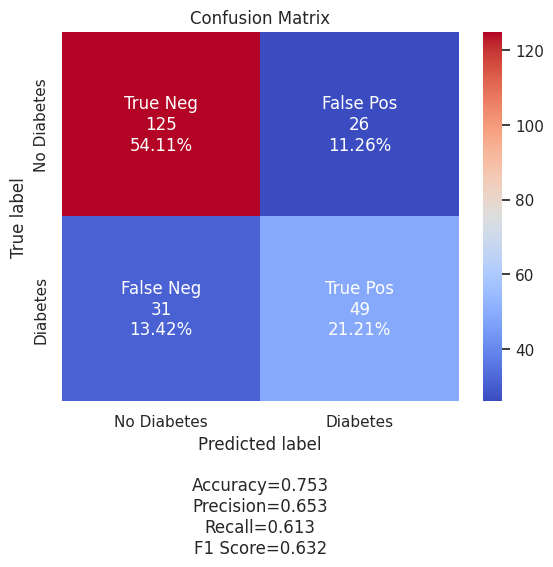

In [53]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['True Neg','False Pos','False Neg','True Pos']
target_names = ["No Diabetes", "Diabetes"]

## let's use the function
make_confusion_matrix(pl_new,group_names=labels,
                      categories=target_names,
                      title="Confusion Matrix",
                      cmap='coolwarm')

In [70]:
## print classification report
from sklearn.metrics import classification_report
target_names = ["No Diabetes", "Diabetes"]
print("Classification Report for new KNN model with n=13 neighbors")
print(classification_report(y_test, y_pred_new, target_names=target_names))

Classification Report for new KNN model with n=13 neighbors
              precision    recall  f1-score   support

 No Diabetes       0.80      0.83      0.81       151
    Diabetes       0.65      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



## Observations from using K=13 from GridSearchCV - Confusion Matrix
* First row 0 - no diabetes
    * 125 (54.11%) True negatives - this went down by 1 from the previous model.
    * 26 (11.26%) False Positives - this went up by 1 from the previous model.

* Second row 1 - diabetes
    * 31 (13.42%) False negatives - this went down by 5 from the previous model.
    * 49 (21.21%) True positives - this went up by 5 from the previous model.

* This means the new model was slightly better at predicting true positives diagnostic of diabetes by ~2% improvement. The new model also had less false negatives by ~2% as well.
* The new model had only 1 less true negative and 1 less false positive.

## Observations from K=13 from GridSearchCV - Classification Report
* The accuracy was 75% for the new model which is up 0.1% from the previous model.
* The precision for this model was slightly improved for predicting no diabetes at 80% compared to 78%, and only slightly improved for predicting diabetes at 65% compared to 64% in the previous model.
* The recall was the same as the previous model for no diabetes, but did improve for predicting diabetes at 61% compared to 55% in the previous model.


**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Random Forest model.
</font>**

In [49]:
# Grid Search CV for Random Forest Model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


## 1. Setup a grid parameter search for random forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

## 2. Instantiate a RF model classifier
rf_model = RandomForestClassifier()

## 3. Create GridSearchCV
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

## 4. Fit GridSearchCV to dataset
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [50]:
## 5. Find best hyperparams and estimator
print("Best Score:" + str(rf_grid.best_score_))

print("Best Parameters: " + str(rf_grid.best_params_))

Best Score:0.7820353063343717
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


## Random Forest Model - Fit with best hyperparameters

In [64]:
## create and fit new RF model
clf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', n_jobs=-1, random_state = 42)
model_rf = clf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_pred_prob_rf = model_rf.predict_proba(X_test)
lr_probs_rf = y_pred_prob_rf[:,1]

## Random Forest Model - Evaluation

In [67]:
## rawconfusion matrix
pl_rf = confusion_matrix(y_test,y_pred_rf)
print(pl_rf)

[[121  30]
 [ 27  53]]


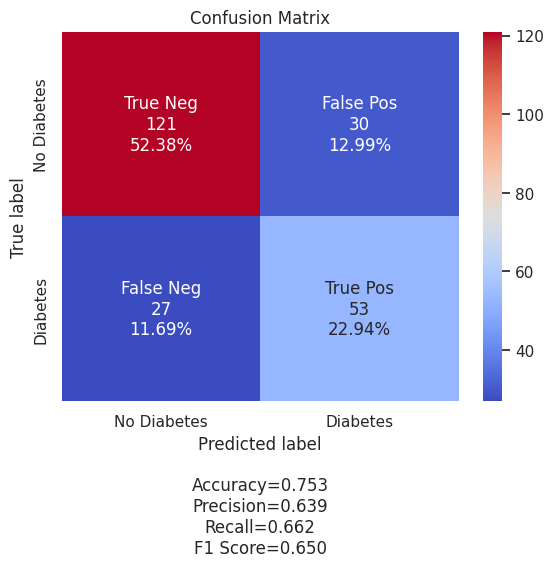

In [68]:
labels = ['True Neg','False Pos','False Neg','True Pos']
target_names = ["No Diabetes", "Diabetes"]

## let's use the function from above
make_confusion_matrix(pl_rf,group_names=labels,
                      categories=target_names,
                      title="Confusion Matrix",
                      cmap='coolwarm')


In [66]:
## print classification report

target_names = ["No Diabetes", "Diabetes"]
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Random Forest Classification Report
              precision    recall  f1-score   support

 No Diabetes       0.82      0.80      0.81       151
    Diabetes       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



## Random Forest Feature Importance

8


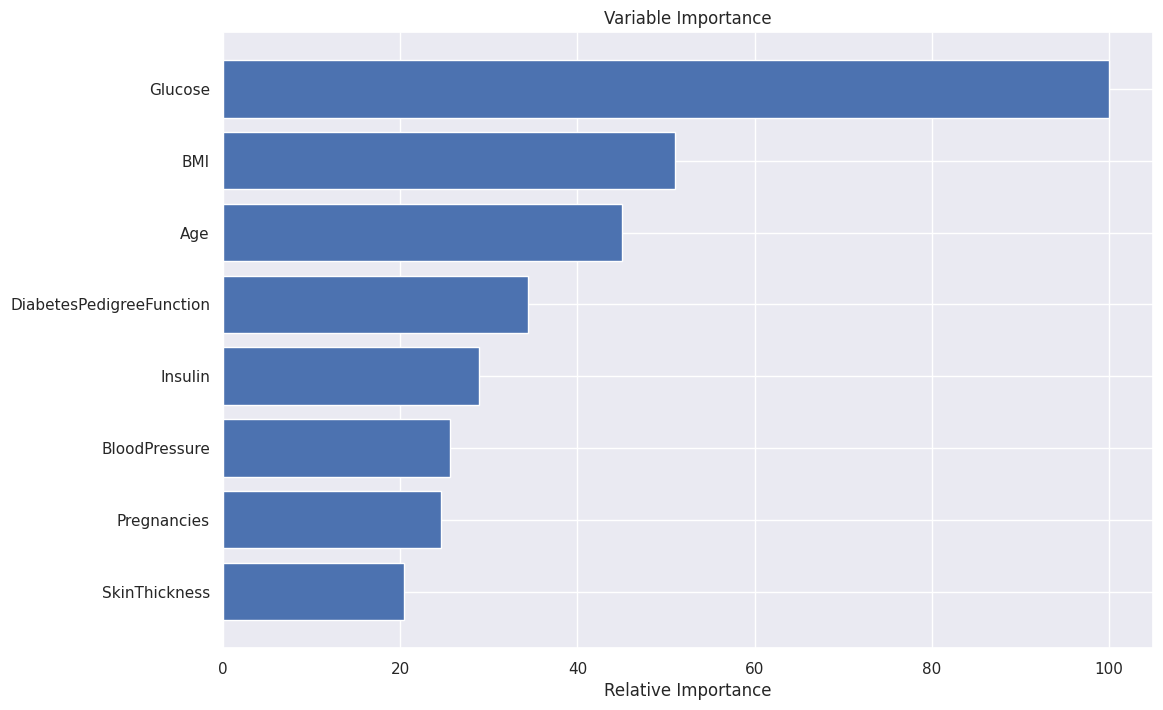

In [69]:
## feature importance
feature_importance = model_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(12,8))

## set up horizontal bar plot
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show();

# Summary of Random Forest Models
* Feature Importance
    * The 3 most important features based on this model were:
        * Glucose
        * BMI
        * Age
    * The 3 least important features were:
        * Skin Thickness
        * Pregnancies
        * Blood Pressure

## Confusion Matrix - Random Forest
* For predicting no diabetes, the model showed:
    * 121 (52.38%) true negatives
    * 30 (12.99%) false positives
* For predicting diabetes, the model showed:
    * 27 (11.69%) false negatives
    * 53 (22.94%) true positives

* Compared to the KNN models:
    * For predicting no diabetes
        * True negatives were the lowest of the 3 models at 121 (125 for KNN=13, 126 for KNN=8)
        * False positives was the highest of the 3 models at 30 (26 for KNN=13, 27 for KNN=8)
    * For predicting diabetes:
        * False negatives was the lowest of the 3 models at 27 (31 for KNN=13, 36 for KNN=8)
        * True positives was the highest of the 3 models at 53 (49 for KNN=13, 44 for KNN=8)

* Based on the confusion matrix, the Random Forest model with grid search was the best model in terms of:
    * Accuracy improvement
    * Better at predicting true positives for diabetes.
    * Predited less false negatives for diabetes.
* However, the model was not as good at predicting true negatives or those who don't have diabetes, and false negatives those with diabetes.

## Classification Report - Random Forest
* For no diabetes:
    * Precision for predicting no diabetes was the highest of the 3 models at 82%.
    * Recall for predicting no diabetes was slightly lower than the previous 2 models at 80% compared to 83% for the other 2 models. This is due to the "precision-recall tradeoff".
    * The F1 score for predicting no diabetes was the same which makes sense as it is the harmonic mean.
* For predicting diabetes:
    * Precision for predicting diabetes remained basically the same at 64%.
    * Recall for predicting diabetes was slightly increased at 66% which again is due to the precision-recall tradeoff.
    * The F1 score for predicting diabetes was the highest at 65% which again makes sense as this is the harmonic mean of the precision-recall values.
* Accuracy was around 75% again so not much improvement there.



# Overall Summary Compared to past studies
* We will compare our results to Bashir et al. from their 2019 study which involved using multiple logistic regression, descriptive analysis and odds ratios using SPSS statistical programming packages.
* Bashir et al. 2019 concluded the following:
    * Pima Indian women were at a higher risk for contracting diabetes if they were:
        * younger in age
        * normal body weight (normal BMI)
        * have a fewer number of children (less pregnancies)
        * with hypotension, low or normal diastolic blood pressures


    * Pima Indian women were at lower risk for contracting diabetes if they were:
        * older age
        * overweight
        * with more children (more pregnancies)
        * hypertension (higher diastolic pressure)

* Based on our choice in models (KNN and Random Forest), the Random Forest is the most interpretable in terms of features predicting the target (diabetic or not).
    * Our RF model showed that the
    * The 3 most important predictors were:
        * Glucose
        * BMI
        * Age
    * The 3 least important predictors were:
        * Skin Thickness
        * Pregnancies
        * Blood Pressure
* We can infer from these results that our findings were similar but to do an apples to apples comparison we would need to perform a logistic regresson analysis.
* I also believe that we could look at other data pre-processing techniques including dimensionality reduction such as PCA and also consider using a Lasso or Ridge regression to better determine what features would be best for modeling so that certain feature variables don't get more weight than others during the model training process.

# References
* Bashir et al, 2019. Significance of Health Related Predictors of Diabetes in Pima Indians Women. Current Research in Nutrition and Food Science. retrieved from: https://www.foodandnutritionjournal.org/volume7number2/significance-of-health-related-predictors-of-diabetes-in-pima-indians-women/
* Das M, Bhattacharyya G, Gong R. Determinants of gestational diabetes pedigree function for pima Indian females. Intern Med Open J. 2022; 6(1): 9-13.
doi: 10.17140/IMOJ-6-121
* de Courten et al, 1996. Hypertension in Pima Indians: Prevalence and Predictors. Vol 111, Supplement 2, pg:40-43.
* Florez JC, Udler MS, Hanson RL. Genetics of Type 2 Diabetes. In: Cowie CC, Casagrande SS, Menke A, Cissell MA, Eberhardt MS, Meigs JB, Gregg EW, Knowler WC, Barrett-Connor E, Becker DJ, Brancati FL, Boyko EJ, Herman WH, Howard BV, Narayan KMV, Rewers M, Fradkin JE, editors. Diabetes in America. 3rd ed. Bethesda (MD): National Institute of Diabetes and Digestive and Kidney Diseases (US); 2018 Aug. CHAPTER 14. PMID: 33651556.
* Grandi AM, Piantanida E, Franzetti I, Bernasconi M, Maresca A, Marnini P, Guasti L, Venco A. Effect of glycemic control on left ventricular diastolic function in type 1 diabetes mellitus. Am J Cardiol. 2006 Jan 1;97(1):71-6. doi: 10.1016/j.amjcard.2005.07.110.
* Ian H. de Boer, Sripal Bangalore, Athanase Benetos, Andrew M. Davis, Erin D. Michos, Paul Muntner, Peter Rossing, Sophia Zoungas, George Bakris; Diabetes and Hypertension: A Position Statement by the American Diabetes Association. Diabetes Care 1 September 2017; 40 (9): 1273–1284. https://doi.org/10.2337/dci17-0026
* Kaggle. Pima Indians Diabetes Database. Retrieved from: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
* O. F. Akmese, 2022. Diagnosing Diabetes with Machine Learning Techniques. Hittite J Sci Eng, 9(1) `09–18.`
* Satpathy et al, 2006. Diagnosis and Management of Diastolic Dysfunction and Heart Failure. AAFP. Volume 73, Number 5, pp: 841-846.
* Schulz LO, Chaudhari LS. High-Risk Populations: The Pimas of Arizona and Mexico. Curr Obes Rep. 2015 Mar;4(1):92-8. doi: 10.1007/s13679-014-0132-9.
* Smithet al. Using the ADAP Learning Algorithm to Forecast
the Onset of Diabetes Mellitus. link: https://europepmc.org/backend/ptpmcrender.fcgi?accid=PMC2245318&blobtype=pdf
* Ye, 2020. Multicollinearity Impacts Your Data Science Project More than You Know. Retrieved from: https://towardsdatascience.com/multicollinearity-impacts-your-data-science-project-more-than-you-know-8504efd706f